# Inertial forces debug

In [2]:
# Import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from beam_corot.ComplBeam import ComplBeam
from beam_corot.CoRot import CoRot
from utils import save_load
from inertial_forces_v2 import inertial_loads_test

In [3]:
# Model input json file  name
f_model_json = "iea15mw_toy_model.json"

# Input files folder
inputfolder = os.path.join(os.getcwd(),'iea15mw')
mainfile = os.path.join(inputfolder,f_model_json)

In [4]:
# Initialize beam model
save_load([0], inputfolder, onlyy=True) # Creates a force file
beam = ComplBeam(mainfile)

# Get initial loads
r = beam.nodeLocations[:,2] # z-axis position
load = r/r[-1]*100
save_load(load,inputfolder, onlyy=True)
beam = ComplBeam(mainfile) # The beam has to be reinstanciated to load the loads

# For non dynamic calculations, the mass matrix is not calculated
f_model_json = "iea15mw_dynamic.json"
inputfolder = os.path.join(os.getcwd(),'iea15mw')
mainfile = os.path.join(inputfolder,f_model_json)

# Calculate mass matrix and apply to static beam
beam_dynamic = ComplBeam(mainfile)
beam.M_mat_full = beam_dynamic.M_mat_full

-----------
ComplBeam Model Created
Static analysis done
-----------
ComplBeam Model Created
Static analysis done
-----------
**********                  No "mass_matrix" type defined                    **********
**********          "mass_matrix" = "Timo" / "Compl" (default = "Timo")        **********
Timo Mass Matrix
ComplBeam Model Created
Dynamic analysis done


## Figure 1: Inertial loads for unitary acceleration in x, y and z-axis in all nodes

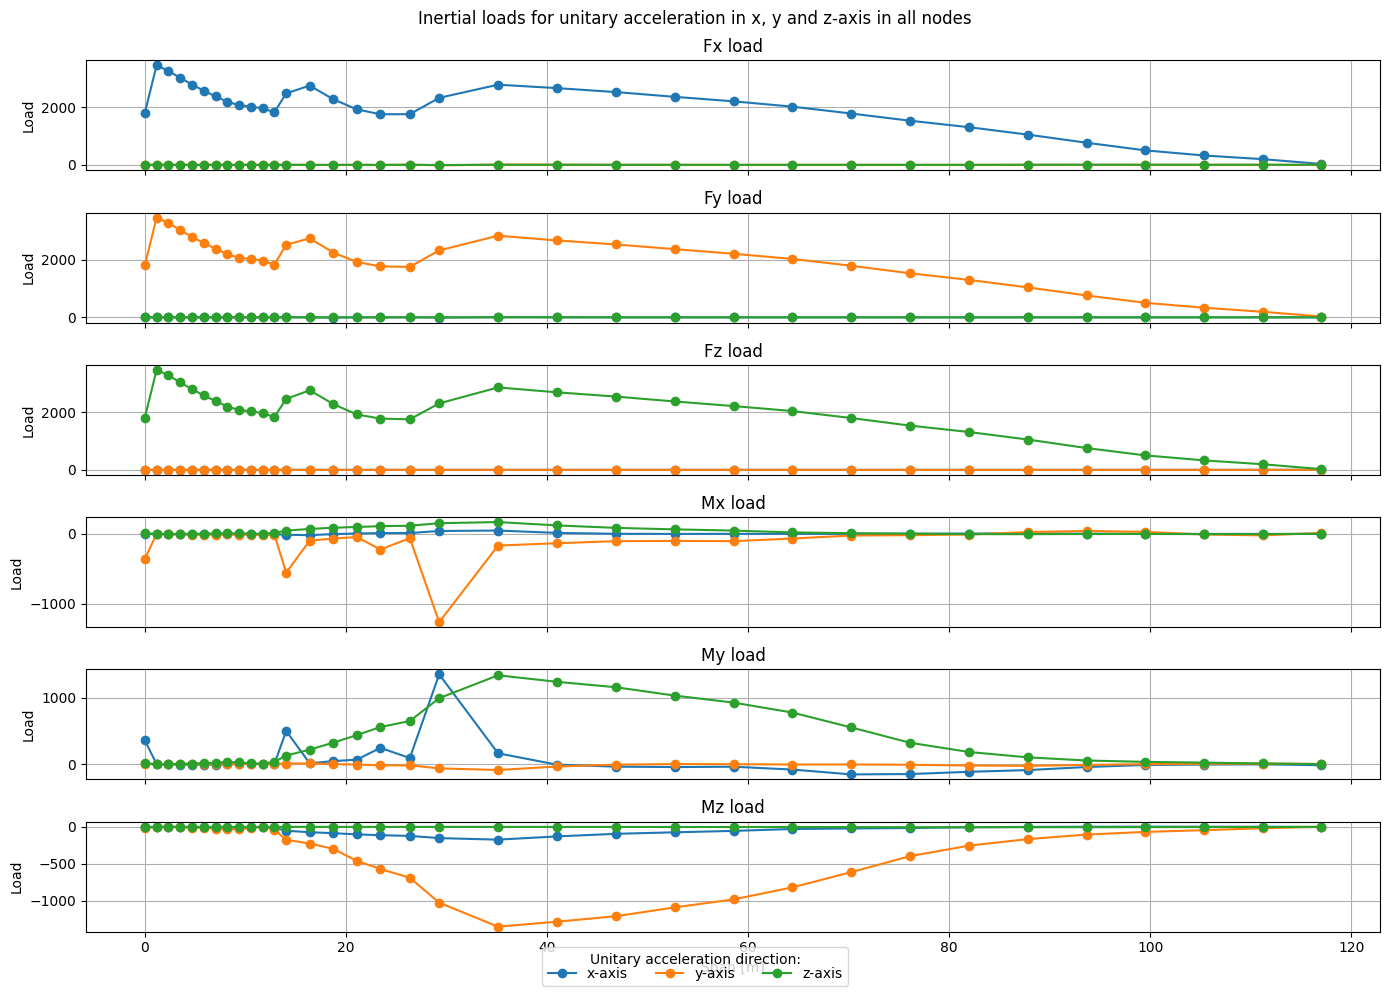

In [4]:
fig1, axs1 = plt.subplots(6,1,figsize=(14,10),sharex=True, layout="tight")
plot_title1 = ["Fx load", "Fy load", "Fz load", "Mx load", "My load", "Mz load"]

acc_lst = [[1,0,0,0,0,0],
            [0,1,0,0,0,0],
            [0,0,1,0,0,0],
]
labels=["x-axis","y-axis","z-axis"]

for acc in acc_lst:

    inertial_loads = inertial_loads_test(beam.M_mat_full,acc)

    inertial_loads = np.reshape(inertial_loads, (-1, 6))

    for i, ax in enumerate(axs1):
        ax.plot(r, inertial_loads[:,i],marker='o', label=f"{acc}")
        ax.set_title(plot_title1[i])
        ax.set_ylabel("Load") 
        ax.grid(True)

fig1.suptitle(f"Inertial loads for unitary acceleration in x, y and z-axis in all nodes")
plt.xlabel("Span [m]")
plt.figlegend(labels, loc = 'lower center',title='Unitary acceleration direction:', ncol=3, labelspacing=0.)
plt.show()

This plot shows the inertial loads experienced by the blade's nodes when a unitary linear acceleration is applied for each direction.

## Figure 2: Inertial loads for unitary acceleration in x-axis in all nodes

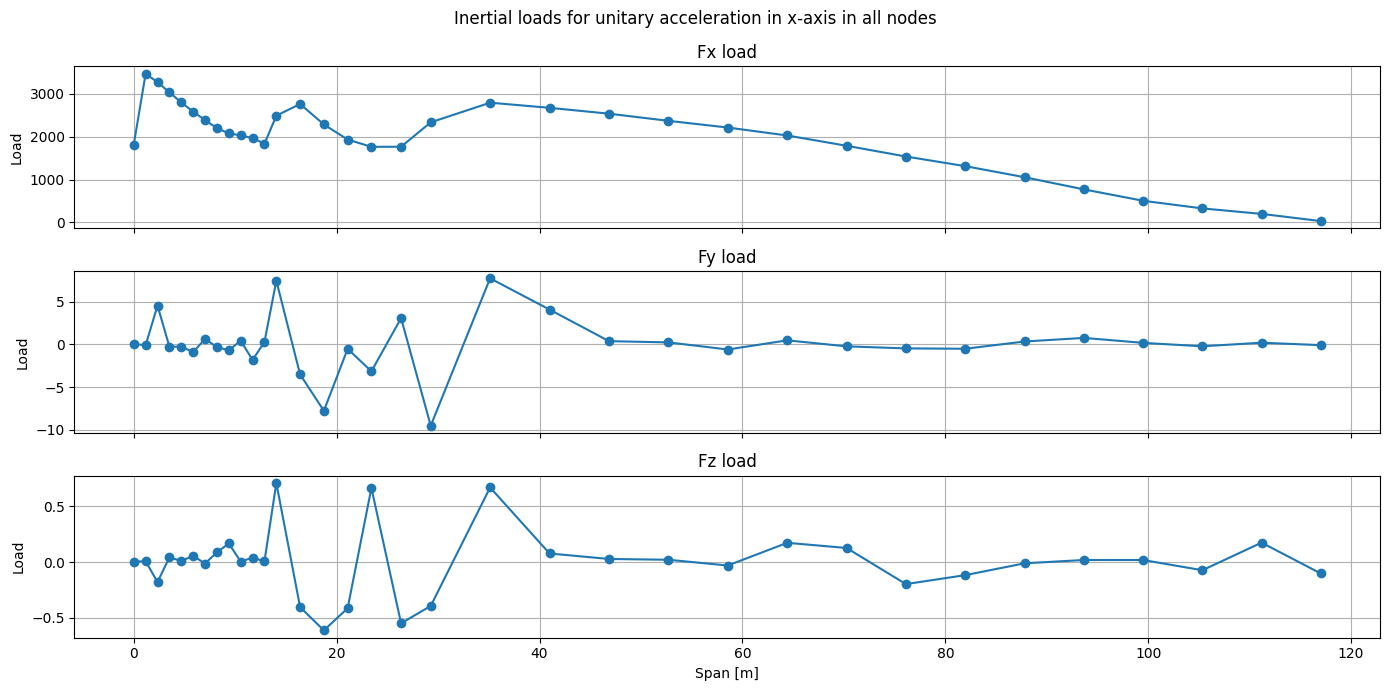

In [5]:
fig, axs = plt.subplots(3,1,figsize=(14,7),sharex=True, layout="tight")
plot_title = ["Fx load", "Fy load", "Fz load"]

acc = [1,0,0,0,0,0]

inertial_loads = inertial_loads_test(beam.M_mat_full,acc)

inertial_loads = np.reshape(inertial_loads, (-1, 6))

for i, ax in enumerate(axs):
        ax.plot(r, inertial_loads[:,i], marker='o')
        ax.set_title(plot_title[i])
        ax.set_ylabel("Load") 
        ax.grid(True)

fig.suptitle(f"Inertial loads for unitary acceleration in x-axis in all nodes")
plt.xlabel("Span [m]")
plt.show()

The applied node acceleration ([1,0,0,0,0,0]) accelerates all nodes at a rate of 1 m/s2 in the blade root x-axis direction. The plotted forces represent the blade's forces in that blade root axis for that acceleration, along the span of the blade.

It is expected to see all loads in the x-axis and not in the perpendicular directions (y and z). However, there are small forces for some of these nodes.

## Figure 3: Forces in the perpendicular directions of the acceleration

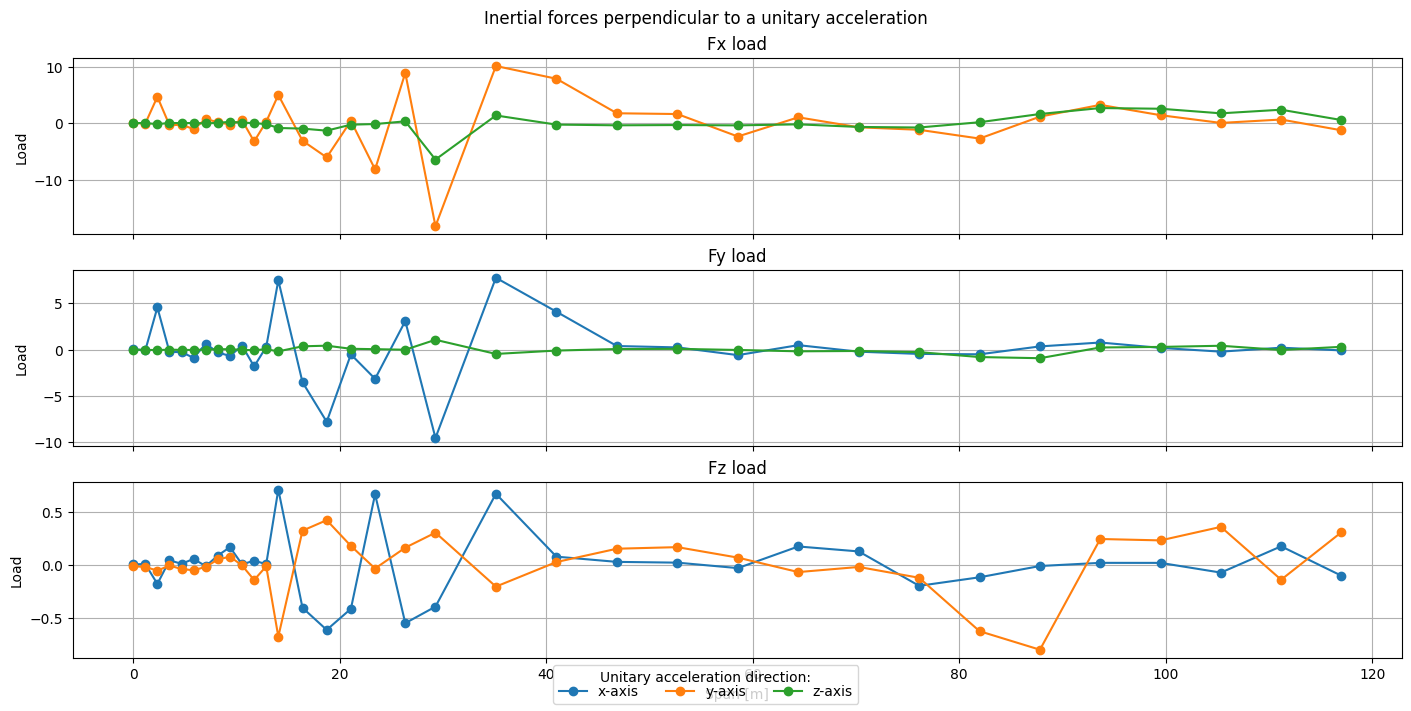

In [6]:
fig, axs = plt.subplots(3,1,figsize=(14,7),sharex=True, layout="constrained")
plot_title = ["Fx load", "Fy load", "Fz load"]
colors = plt.cm.tab10.colors

acc_lst = [[1,0,0,0,0,0],
            [0,1,0,0,0,0],
            [0,0,1,0,0,0],
]
labels=["x-axis","y-axis","z-axis"]
lines=[]
for acc_i, acc in enumerate(acc_lst):

    inertial_loads = inertial_loads_test(beam.M_mat_full,acc)

    inertial_loads = np.reshape(inertial_loads, (-1, 6))

    for i, ax in enumerate(axs):
        if acc_i != i:
            line, = ax.plot(r, inertial_loads[:,i],marker='o',color=colors[acc_i])
            ax.set_title(plot_title[i])
            ax.set_ylabel("Load") 
            ax.grid(True)
    lines.append(line)
fig.suptitle(f"Inertial forces perpendicular to a unitary acceleration")
plt.xlabel("Span [m]")
plt.figlegend(lines, labels, loc = 'lower center',title='Unitary acceleration direction:', ncol=3, labelspacing=0.)
plt.show()

The graph above shows the perpendicular forces plotted against the accelerations. It is evident that there is some form of coupling between the perpendicular forces and all acceleration directions. Some of the forces may appear too large to be attributed to floating point precision errors.

## Figure 4: Inertial moments parallel to a unitary acceleration

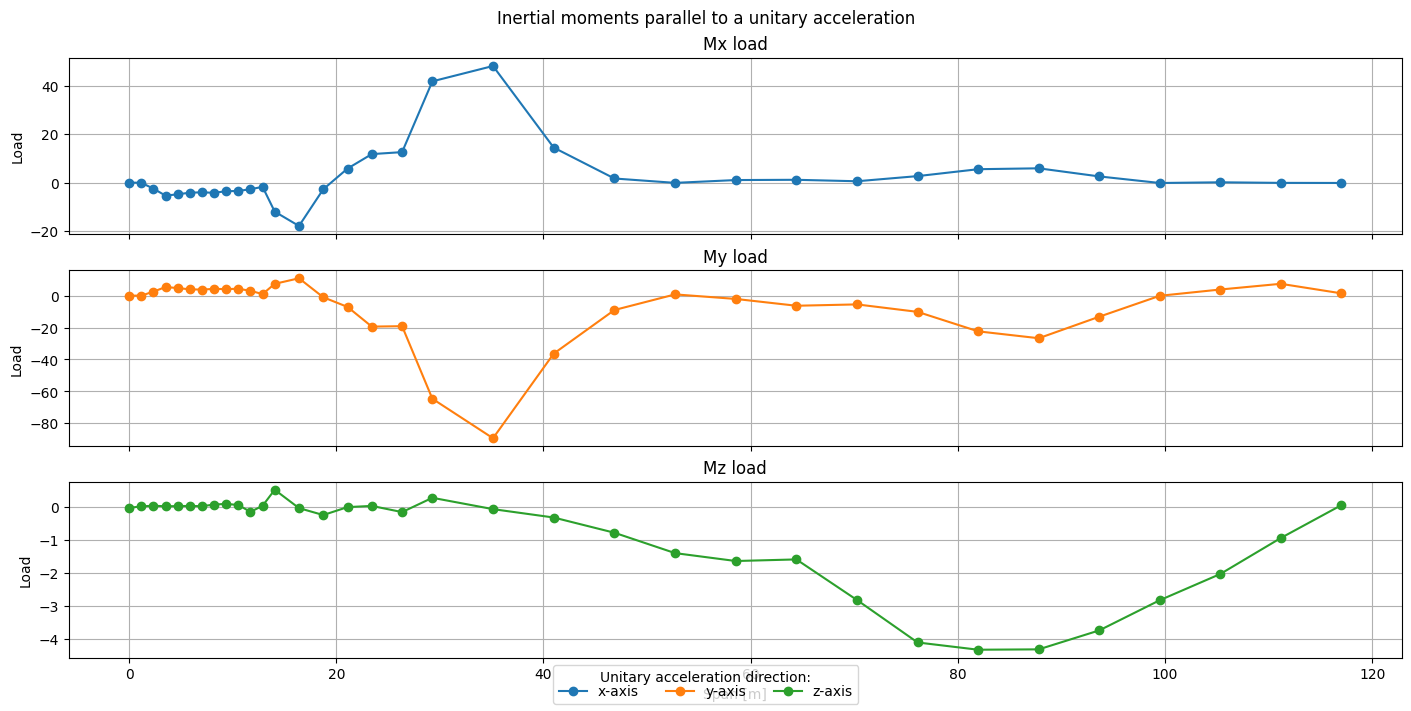

In [5]:
fig, axs = plt.subplots(3,1,figsize=(14,7),sharex=True, layout="constrained")
plot_title = ["Mx load", "My load", "Mz load"]
colors = plt.cm.tab10.colors

acc_lst = [[1,0,0,0,0,0],
            [0,1,0,0,0,0],
            [0,0,1,0,0,0],
]
labels=["x-axis","y-axis","z-axis"]
lines=[]
for acc_i, acc in enumerate(acc_lst):

    inertial_loads = inertial_loads_test(beam.M_mat_full,acc)

    inertial_loads = np.reshape(inertial_loads, (-1, 6))

    for i, ax in enumerate(axs):
        if acc_i == i:
            line, = ax.plot(r, inertial_loads[:,i+3],marker='o',color=colors[acc_i])
            ax.set_title(plot_title[i])
            ax.set_ylabel("Load") 
            ax.grid(True)
    lines.append(line)
fig.suptitle(f"Inertial moments parallel to a unitary acceleration")
plt.xlabel("Span [m]")
plt.figlegend(lines, labels, loc = 'lower center',title='Unitary acceleration direction:', ncol=3, labelspacing=0.)
plt.show()

The linear accelerations are coupled to the vertical inertial moments due to the offset between the nodes where the forces are calculated and the centre of gravity (see Figure 1). However, this coupling should not occur with the moments in the same direction. Nonetheless, the above plotted values of these moments are not zero, with the largest differences being in the x and y directions.

## The mass matrix

In [14]:
M_mat = beam.M_mat_full
node_i = 10
M_mat[node_i*6:node_i*6+3,node_i*6:node_i*6+3]

array([[ 1.31883941e+03, -2.54464569e+00,  7.47527770e-02],
       [-2.54464569e+00,  1.32137544e+03, -1.28703693e-01],
       [ 7.47527770e-02, -1.28703693e-01,  1.31512453e+03]])

The mass matrix section from node 10 is displayed above. This part couples the linear accelerations with the linear forces. Here it is evident that the off-diagonal elements are non-zero.